In [2]:
import json, os, glob
import pandas as pd
import feather
from collections import Counter
from pathlib import Path

rows = []
links = []
count=0

json_dir = 'russianDataSets/ru/'
# Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
json_pattern = os.path.join(json_dir, '*.json')

# Uses Glob with the json pattern variable to place all the json files and their directories in a list
file_list = glob.glob(json_pattern)

# directory to save data to
save_dir = "./allRussianTweets.ftr"

# Opens the JSON file
for file in file_list:
    with open(file, 'r') as f:
        for line in f:
            if count > 10000:
                break
            count = 0
            data = json.loads(line)

            if count == 0:
                #username
                user_id = data["user"]["screen_name"]
                #location
                user_location = data["user"]["location"]
                #Tweet ID
                tweet_id = data["id_str"]
                #Hashtags
                hashtags = data["entities"]["hashtags"]
                #tweet text
                if "extended_tweet" in data:
                    text = data["extended_tweet"]["full_text"]
                else:
                    text = data["text"]
                rows.append((user_id, user_location, tweet_id, hashtags, text))
        
pd.options.display.max_colwidth = 500
datas = pd.DataFrame(rows, columns=["user_id", "user_location", "tweet_id", "hashtags", "text"])
datas.to_feather(save_dir)
display(datas)

,user_id,user_location,tweet_id,hashtags,text
0,ColdAbbess,Андван.,1234266322038599680,[],"RT @Shining_Stri: @ColdAbbess Да, харизма это то, что надо для того чтобы манипулировать людьми без палева. И тёмная сторона даёт такие плю…"
1,Shining_Stri,Бич бич нах,1234266183731421184,[],"@ColdAbbess Да, харизма это то, что надо для того чтобы манипулировать людьми без палева. И тёмная сторона даёт такие плюшки как молнии, удушение, сдавливание внутренностей, высасывание жизни, это ещё +100 к мощи и +150 к авторитету, а ещё +1000 к страху"
2,MikhalkoChen,None,1234264061493284864,[],"RT @VovaBlya: У кого есть достоверная инфа по Сирии??? Что там сейчас происходит.\nТолько не слухи пожалуйста, и не желтая пресса!"
3,ColdAbbess,Андван.,1234262876782759938,[],"@Shining_Stri Задача непростая. Тут можно силовыми методами. Неверных в бездну к хуям, а остальные пусть присекают в верности. Опять же, при этом лютая, но обоснованная и хорошо продуманная пропаганда должна быть. Нужно показать плюсы Тёмной стороны, все плюшки и вундкрвафли в отношении ситхов"
4,wurst_olga,None,1234262222924402688,"[{'indices': [21, 31], 'text': 'ДляТюрьмы'}, {'indices': [32, 45], 'text': 'ДляЛюстрации'}]",RT @RabinovichSlava: #ДляТюрьмы #ДляЛюстрации\n\nПРОПАГАНДА УБИВАЕТ\n\nТекст для видео в следующем твите https://t.co/mp4N2zuBvd
...,...,...,...,...,...
202752,DeltaIncognito,None,1277755023699697666,[],@k_xm_v Возможно это влияние внутренних демонов
202753,GlavTW,Россия,1277754946784563200,[],"Соперник Лукашенко оценил влияние России и США на законность выборов\n\nОдин из соперников Александра Лукашенко на президентских выборах в Белоруссии Валерий Цепкало выразил надежду, что Москва будет выступать за то, чтобы законы в союзном государстве соблюдались. Политик заявил... https://t.co/0k1u59qK2I"
202754,boroda_2591,#Россия #Кузбасс,1277754484114853888,[],Соперник Лукашенко оценил влияние России и США на законность выборов https://t.co/lTRoXXL9nN
202755,jenkers_ru,Москва,1277754430033735685,"[{'indices': [9, 19], 'text': 'Лукашенко'}]",Соперник #Лукашенко оценил влияние России и США на законность выборов https://t.co/VPVZA0r39L https://t.co/RSIKDHQNxp


In [1]:
import json, os, glob
import pandas as pd
import feather
from collections import Counter
from pathlib import Path

rows = []
links = []
#num = Path('2020-03-19.json').stat().st_size
count=0

json_dir = '../russianDataSets/ru/'
# Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
json_pattern = os.path.join(json_dir, '*.json')

# Uses Glob with the json pattern variable to place all the json files and their directories in a list
file_list = glob.glob(json_pattern)

# directory to save data to
save_dir = "./russianNoRetweets.ftr"

# Opens the JSON file
for file in file_list:
    with open(file, 'r') as f:
        for line in f:
            if count > 10000:
                break
            count = 0
            data = json.loads(line)

            if count == 0:
                # Retweet?
                if data["text"][:2] != "RT":
                    #username
                    user_id = data["user"]["screen_name"]
                    #location
                    user_location = data["user"]["location"]
                    #Tweet ID
                    tweet_id = data["id_str"]
                    #Hashtags
                    hashtags = data["entities"]["hashtags"]
                    # Retweet?
                    retweet = data["retweeted"]
                    #tweet text
                    if "extended_tweet" in data:
                        text = data["extended_tweet"]["full_text"]
                    else:
                        text = data["text"]
                    rows.append((user_id, user_location, tweet_id, hashtags, text))
        
pd.options.display.max_colwidth = 500
datas = pd.DataFrame(rows, columns=["user_id", "user_location", "tweet_id", "hashtags", "text"])
datas.to_feather(save_dir)
display(datas)

,user_id,user_location,tweet_id,hashtags,text
0,Shining_Stri,Бич бич нах,1234266183731421184,[],"@ColdAbbess Да, харизма это то, что надо для того чтобы манипулировать людьми без палева. И тёмная сторона даёт такие плюшки как молнии, удушение, сдавливание внутренностей, высасывание жизни, это ещё +100 к мощи и +150 к авторитету, а ещё +1000 к страху"
1,ColdAbbess,Андван.,1234262876782759938,[],"@Shining_Stri Задача непростая. Тут можно силовыми методами. Неверных в бездну к хуям, а остальные пусть присекают в верности. Опять же, при этом лютая, но обоснованная и хорошо продуманная пропаганда должна быть. Нужно показать плюсы Тёмной стороны, все плюшки и вундкрвафли в отношении ситхов"
2,sarbescuedoll,Minsk,1234261721172324352,[],@17braincells у предыдущих кроме того что они просто выросли никаких изменений у тебя же чисто влияние ХОТЯ ДОЛЖНО БЫЛО АНИМЕ ПОВЛИЯТЬ
3,TVB777,None,1234261668558827521,[],"Те, кто пытаются использовать Twitter не как источник информации, а как инструмент влияния, бессмысленно теряют время, т.к. они оказывают нулевое влияние на внешний мир. \n\nА люди, которые пытаются использовать Twitter для решения своих личных проблем, выглядят жалко и смешно."
4,NewsexpressRu,None,1234259849447452673,"[{'indices': [94, 102], 'text': 'новости'}, {'indices': [103, 108], 'text': 'news'}]",Врачи и эксперты Минздрава РФ развеяли слухи о токсичности лекарства… https://t.co/Jeewtq0sIS #новости #news
...,...,...,...,...,...
116217,DeltaIncognito,None,1277755023699697666,[],@k_xm_v Возможно это влияние внутренних демонов
116218,GlavTW,Россия,1277754946784563200,[],"Соперник Лукашенко оценил влияние России и США на законность выборов\n\nОдин из соперников Александра Лукашенко на президентских выборах в Белоруссии Валерий Цепкало выразил надежду, что Москва будет выступать за то, чтобы законы в союзном государстве соблюдались. Политик заявил... https://t.co/0k1u59qK2I"
116219,boroda_2591,#Россия #Кузбасс,1277754484114853888,[],Соперник Лукашенко оценил влияние России и США на законность выборов https://t.co/lTRoXXL9nN
116220,jenkers_ru,Москва,1277754430033735685,"[{'indices': [9, 19], 'text': 'Лукашенко'}]",Соперник #Лукашенко оценил влияние России и США на законность выборов https://t.co/VPVZA0r39L https://t.co/RSIKDHQNxp


In [3]:
import re
import pandas as pd
import feather
from collections import Counter

# adjustable file in ftr format
save_dir = "./allRussianTweets.ftr"

# reads contents of save_dir.ftr
read_ftr = pd.read_feather(save_dir, columns=None, use_threads=True);

# finds 100 most common words
Counter(" ".join(read_ftr["text"]).split()).most_common(100)

[('и', 103104),
 ('в', 92190),
 ('RT', 86599),
 ('на', 74799),
 ('не', 63928),
 ('что', 51786),
 ('о', 38515),
 ('пропаганда', 34965),
 ('фейки', 33525),
 ('с', 29066),
 ('слухи', 28190),
 ('это', 27975),
 ('за', 27143),
 ('влияние', 26912),
 ('-', 24461),
 ('как', 20642),
 ('а', 17438),
 ('по', 17383),
 ('я', 17060),
 ('про', 15699),
 ('у', 13334),
 ('В', 11811),
 ('все', 11295),
 ('но', 10681),
 ('к', 10240),
 ('от', 10121),
 ('из', 9751),
 ('так', 9578),
 ('А', 9560),
 ('вранье', 9398),
 ('то', 9038),
 ('Пропаганда', 8308),
 ('уже', 8245),
 ('же', 8097),
 ('только', 7915),
 ('его', 7784),
 ('для', 7736),
 ('Это', 7205),
 ('вот', 7089),
 ('И', 6940),
 ('он', 6506),
 ('Я', 6371),
 ('они', 6205),
 ('утки', 6174),
 ('до', 6105),
 ('обманывать', 6050),
 ('мошенничество', 6015),
 ('бы', 5963),
 ('или', 5904),
 ('коронавирусе', 5888),
 ('том,', 5886),
 ('вы', 5883),
 ('их', 5753),
 ('просто', 5628),
 ('если', 5549),
 ('–', 5458),
 ('—', 5449),
 ('меня', 5444),
 ('манипулировать', 5124),
 (

In [17]:
import re
import pandas as pd
import feather
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# adjustable file in ftr format
save_dir = "../ftrs/russianNoRetweets.ftr"

# reads contents of save_dir.ftr
read_ftr = pd.read_feather(save_dir, columns=None, use_threads=True);

# adjustable vocabulary list.
# only works if the words do not contain whitespace.
vocab = ["я", "мы", "ты", "нас", "вы", "тебя", "меня","мне", "вас", "их", "они"]

# series to list adapter
# Places all tweet text in a list, seperated by word.
s = (" ".join(read_ftr["text"]).split())

# creates a dictionary object where k=vocab[x] and v=counter
wordcount = dict((x,0) for x in vocab)

# for each w in text, if w is in the dictionary object, increase the respective counter.
for i in s:
    for w in re.findall(r"\w+", i):
        if w.lower() in wordcount:
            wordcount[w.lower()] += 1
            
def percentage(part, whole):
  return round(100 * float(part)/float(whole), 2)

# prints results to console.
total = []
total_num = 0
for i in wordcount:
    total_num+=wordcount[i]
    total.append(wordcount[i])

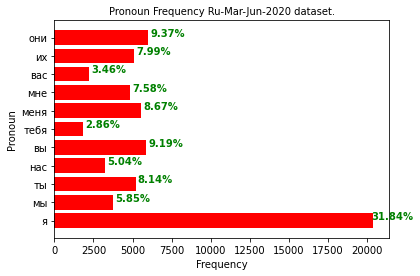

<Figure size 432x288 with 0 Axes>

In [21]:
ax = plt.barh(range(len(wordcount)), list(wordcount.values()), align='center', color="r")
plt.yticks(range(len(wordcount)), list(wordcount.keys()))
plt.title("Pronoun Frequency Ru-Mar-Jun-2020 dataset.",fontsize= 10)
plt.xlabel('Frequency')
plt.ylabel('Pronoun')

for i, v in enumerate(total):
    plt.text(v+1250, i+.25, str(percentage(total[i], total_num)) + "%", color='green', fontweight='bold', verticalalignment='center', horizontalalignment='center')

plt.show()
plt.savefig('ru-2020-freq-of-pronouns_v3.png')

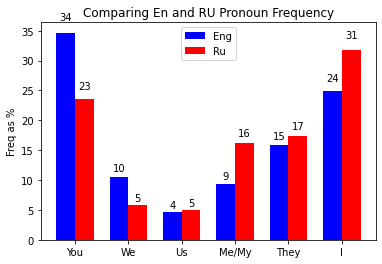

In [23]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
#eng = {"You": 34.67, "We":10.58, "Us":4.72, "Me/My":9.33, "They":15.8, "I":24.9}
eng = [34.67, 10.58, 4.72, 9.33, 15.8, 24.9]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, eng, width, color='blue')

#ru ={"You": 23.65, "We":5.85, "Us":5.04, "Me/My":16.25, "They":17.36, "I":31.85}

ru = [23.65, 5.85, 5.04, 16.25, 17.36, 31.85]

rects2 = ax.bar(ind + width, ru, width, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Freq as %')
ax.set_title('Comparing En and RU Pronoun Frequency')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('You', 'We', 'Us', 'Me/My', 'They', "I"))

ax.legend((rects1[0], rects2[0]), ('Eng', 'Ru'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Breakdown of above russian count to english translation: 
<br /> I &rightarrow; *18,410*
<br /> You &rightarrow; *15,054*
<br /> Me &rightarrow; *11,136*
<br /> Us &rightarrow; *5,146*
<br /> We &rightarrow; *4,011*
<br /> They &rightarrow; *63*

In [69]:
f = open("allRu-2020-TweetText.txt", "w+", encoding="utf8")

# adjustable file in ftr format
save_dir = "./allRussianTweets.ftr.ftr"

# reads contents of save_dir.ftr
read_ftr = pd.read_feather(save_dir, columns=None, use_threads=True);

s = (" ".join(read_ftr["text"]).split())

for i in s:
    f.write(i)
    f.write("\n")

f.close()

In [4]:
import nltk
 
def get_all_phases_containing_tar_wrd(target_word, tar_passage, left_margin = 10, right_margin = 10):
    """
        Function to get all the phases that contain the target word in a text/passage tar_passage.
        Workaround to save the output given by nltk Concordance function
         
        str target_word, str tar_passage int left_margin int right_margin --> list of str
        left_margin and right_margin allocate the number of words/pununciation before and after target word
        Left margin will take note of the beginning of the text
    """
     
    ## Create list of tokens using nltk function
    tokens = nltk.word_tokenize(tar_passage)
     
    ## Create the text of tokens
    text = nltk.Text(tokens)
 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([text.tokens[map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset])[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return "\n" + [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

f = open('allRu-2020-TweetText.txt', 'r', encoding='utf-8')
raw = f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)
text.concordance('я') # default text.concordance output

print('Results from function')
results = get_all_phases_containing_tar_wrd("я", raw)
for result in results:
    print('a)' + result)

KeyboardInterrupt: 

NLTK Concordance

In [5]:
import sys

sys.version

'3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]'

In [5]:
import nltk
import os

f = open('allRu-2020-TweetText.txt', 'r', encoding='utf-8')
raw = f.read()
tokens = word_tokenize(raw)
text = nltk.Text(tokens)

text.concordance('я')

Displaying 25 of 25197 matches:
l @ 777hjr одни слухи Приснилось , что я доминировала над одним мужчиной , прич
 , а в психоэмоциональном смысле . Так я прочувствовала своё влияние и власть О
ps Вот именно все как в первом твите , я испушу все петициями и буду громкая . 
 . https : //t.co/bfFgKMHsNK Конечно , я сама над хс не работаю , но это то , ч
ма над хс не работаю , но это то , что я слышала от его авторов . Вдруг кто-то 
о еще не знал , как пишется комикс , и я понимаю , что для них вмешательство Ха
nprincess88 Ебать ты тупой . Ты пишешь я одобряю хейт . Где там одобрение ? Где
, чем один день войны. » @ rossy_twt а я думал причем тут утки @ mkomsomolets А
очных реперков . @ torunar @ turbojedi Я все еще не понимаю как количество секу
ро энергетики и их влияние на организм я : о это может привести к депрессии я :
м я : о это может привести к депрессии я : но меня к депрессии привело мое рожд
It Diodato - Fai Rumore @ _mixXxer_ Ну я ж про что и говорю , только пара проце
в . @ do